## Introduction to Scikit-Learn (sklearn)

### Workflow

* Get data ready
* Pick a model
* Fit the model
* Evaluate the model
* Improve through experimentation
* Save and reload the model

What we are going to cover:

In [30]:
what_were_covering = [    
    "0. And end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating the model",
    "5. Improving the model",
    "6. Save and load a trained model",
    "7. Putting it all together"]

## And end-to-end Scikit-Learn Workflow

In [123]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
# Create x ( feature matrix)
x = heart_disease.drop('target',axis = 1)

# Create y ( labels)
y = heart_disease['target']

In [33]:
#2. Chosse the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
#3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [35]:
clf.fit(x_train,y_train);

In [36]:
# Making a prediction

y_prediction = clf.predict(x_test)
y_prediction

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [37]:
y_test

235    0
246    0
117    1
70     1
287    0
      ..
280    0
29     1
126    1
148    1
104    1
Name: target, Length: 61, dtype: int64

In [38]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [39]:
clf.score(x_test, y_test)

0.819672131147541

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.86      0.88      0.87        41

    accuracy                           0.82        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.82      0.82      0.82        61



In [41]:
confusion_matrix(y_test, y_prediction)

array([[14,  6],
       [ 5, 36]], dtype=int64)

In [42]:
accuracy_score(y_test, y_prediction)

0.819672131147541

In [43]:
#5. Improve the Method
#Try a different method of n_estimators

np.random.seed(42)
for i in range(1,100,10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f'Model accuracy on test set: { clf.score(x_test,y_test)*100:.2f}%')
    print('')

Trying model with 1 estimators...
Model accuracy on test set: 70.49%

Trying model with 11 estimators...
Model accuracy on test set: 80.33%

Trying model with 21 estimators...
Model accuracy on test set: 81.97%

Trying model with 31 estimators...
Model accuracy on test set: 78.69%

Trying model with 41 estimators...
Model accuracy on test set: 88.52%

Trying model with 51 estimators...
Model accuracy on test set: 85.25%

Trying model with 61 estimators...
Model accuracy on test set: 83.61%

Trying model with 71 estimators...
Model accuracy on test set: 83.61%

Trying model with 81 estimators...
Model accuracy on test set: 85.25%

Trying model with 91 estimators...
Model accuracy on test set: 83.61%



In [44]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl','wb'))

In [45]:
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))
loaded_model.score(x_test, y_test)

0.8360655737704918

In [46]:
what_were_covering

['0. And end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improving the model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [47]:
#Standart imports

import numpy as np
import pandas as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting the data ready to be used

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling (also calling imputing) or disregarding missing values
    3. Converting non numerical values to numerical values (AKA feature coding) 

In [48]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
x = heart_disease.drop('target',axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [50]:
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [51]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [53]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [54]:
len(car_sales)

1000

In [55]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [56]:
# Split into x/y

x = car_sales.drop('Price',axis = 1)
y = car_sales.Price

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [57]:
# Build ML model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [58]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [ "Make" , "Colour" , "Doors" ]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [59]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [60]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [61]:
# Let's try to refit the model
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
model.score(x_test,y_test)

0.17883801590784532

### 1.2 What if there were missing values

1. Fill them with some value
2. Remove the samples with missing data altogether

In [63]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [64]:
# How many missing values are there?
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [65]:
#Create x and y

x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing.Price

#### Option 1: Fill missing data with Pandas


In [66]:
car_sales_missing.Doors.value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [67]:
# Fill the 'Make' column
car_sales_missing.Make.fillna('missing', inplace = True)

#Fill teh Colour Column
car_sales_missing.Colour.fillna('missing',inplace = True)

#Fill Odometer Column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

#Fill the Doors Columns 
car_sales_missing.Doors.fillna(4, inplace = True )

In [68]:
 # Check dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [69]:
#Removing the rows with missing price value
car_sales_missing.dropna(inplace = True)

In [70]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [71]:
x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing.Price

### Option 2: Fill missing values with Scikit-learn

In [72]:
car_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [73]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [74]:
#Drop the rows with no labels
car_missing.dropna(subset = ['Price'], inplace = True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [75]:
# Split into x and y
x = car_missing.drop('Price', axis = 1)
y = car_missing.Price

In [76]:
#Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

#Define Columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#Create an imputer 
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [77]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns = ['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [78]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [79]:
# Let's try and convert these numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [ "Make" , "Colour",'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder = 'passthrough')

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [124]:
# Now we've got our data as numbers and filled
#Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [950, 506]

In [125]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/alg for our problem

Scikit-learn uses estimator as another term for machine learning model or algorithm

* Classification - if it's one thing one another
* Regression - predicting a number

Step 1 - Check teh Scikit-Learn machine learning map

### 2.1 Picking a ML model for a regression problem

In [126]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [127]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [128]:
#How many samples
len(boston_df)

506

In [129]:
# Let's try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop('target', axis = 1)
y = boston_df.target

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Intall Ridge model
model = Ridge()
model.fit(x_train,y_train)

#Check the score 

model.score(x_test, y_test)

0.6662221670168519

How do we improve this score?

What if Ridge wasn't working?

In [130]:
# Let's try Random Forest
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop('target', axis = 1)
y = boston_df.target

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiating Random Forest
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)

#Check the score 

rf.score(x_test, y_test)

0.8654448653350507

In [131]:
# Check teh Ridge model again
model.score(x_test, y_test)

0.6662221670168519

### 2.2 Choosing an stimator for a Classification Problem

In [132]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [134]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

# Split the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Instatiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

#Evaluate the model
clf.score(x_test,y_test)

C:\Users\erica\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [135]:
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### Trying Ensemble Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rd = RandomForestClassifier()
rd.fit(x_train, y_train)

rd.score(x_test, y_test)

0.8360655737704918

Tidbit:
    
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep leaning or transfer learning

### 3. Fit the model/algorith on our data and use it to make predictions

#### 3.1  Fitting the model to the data

* x = features, features variables, data
* y = lables, targets, target variables

In [137]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rd = RandomForestClassifier()
rd.fit(x_train, y_train)

rd.score(x_test, y_test)

0.8360655737704918

### Making predictions on data the model hasn't seen

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [138]:
# Used a trained model to make predictions

clf.predict(np.array([1,7,8,3,4])) # this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1 7 8 3 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [139]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [140]:
# Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [141]:
# Another way of doing that
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

Make predictions with `predict_proba()`

In [142]:
# predict_proba() returns probabilities of a classification label
#Probabilidade de ser 1 e de ser 0
rd.predict_proba(x_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

`predict()` can also be used for regression

In [143]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed()

# Create the data
x = boston_df.drop('target', axis = 1)
y = boston_df.target

#Split into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#Instantiate and fit model
model = RandomForestRegressor(n_estimators = 100).fit(x_train,y_train)

# Make prediction
y_preds = model.predict(x_test)

In [144]:
y_preds[:10]

array([40.857, 19.613, 31.723, 23.664, 17.6  , 12.015, 25.098, 29.015,
       26.217, 21.298])

In [145]:
np.array(y_test[:10])

array([43.1, 23.8, 29.6, 22.9, 20. , 11.8, 22.5, 27.9, 23.9, 20.7])

In [146]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1754313725490175

## 4. Evaluating a Machine Learning Model

3 ways to evaluate Scikit-Learn models/estimators

1. Estimator `score`method
2. The `scoring` parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with a score method

In [147]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [148]:
clf.score(x_train,y_train)

1.0

In [149]:
clf.score(x_test,y_test)

0.8524590163934426

In [150]:
# Let's do the same bit for Regression

from sklearn.ensemble import RandomForestRegressor

x = boston_df.drop('target', axis = 1)
y = boston_df.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)

In [151]:
model.score(x_test,y_test)

0.8494501439301596

### 4.2 Evaluating a model using the `scoring` parameter

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
# semicolon not to show result
clf.fit(x_train, y_train);

In [153]:
clf.score(x_test, y_test)

0.8524590163934426

In [154]:
cross_val_score(clf,x,y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

### Obs: K-fold Cross-Validation

I used 5 ( as in cv = 5) - cv stands for Cross Validation

It does k different splits with training and test together and then gives you a score
fro each group 

In [155]:
np.random.seed(42)

# Prefer the cross validation method when reporting the accuracy of the model

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv = 5))

# Comparing the 2
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

#### Default scoring parameter of classifier = mean accuracy
`clf.score()`

In [156]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification Model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

#### Accuracy

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf, x, y, cv = 5)

In [158]:
np.mean(cross_val_score)

0.8215300546448088

In [159]:
print(f'Heart Disease Classiifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%')

Heart Disease Classiifier Cross-Validated Accuracy: 82.15%


**Area under the Receiver Operating Characteristic curve(AUC/ROC)** 

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true prostive rate (tpr) versus a model false positive rate (fpr)

* True positive = positivo verdadeiro
* False negative = aka falso negativo
* True negative
* Falso negativo = falso negativo

In [160]:
# Create x_test ...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [161]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.89, 0.11],
        [0.05, 0.95],
        [0.1 , 0.9 ],
        [0.79, 0.21],
        [0.09, 0.91],
        [0.02, 0.98],
        [0.76, 0.24],
        [0.19, 0.81],
        [0.62, 0.38],
        [0.99, 0.01]]),
 61)

In [162]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [163]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

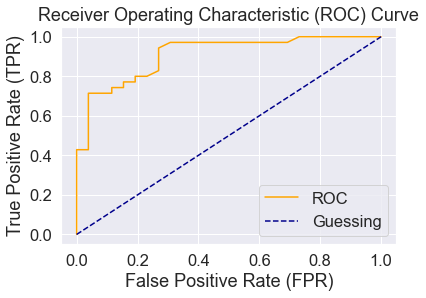

In [164]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    '''
    # plot roc curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the plot
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [165]:
from sklearn.metrics import roc_auc_score
# ps: auc - area under curve
roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

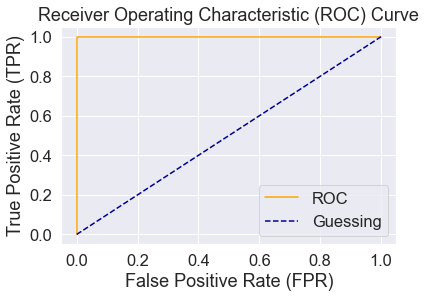

In [166]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [167]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [168]:
# Visualize confusion matrix with pd crosstab
pd.crosstab(y_test,
           y_preds,
           rownames = ['Actual Label'],
           colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,21,5
1,8,27


In [169]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



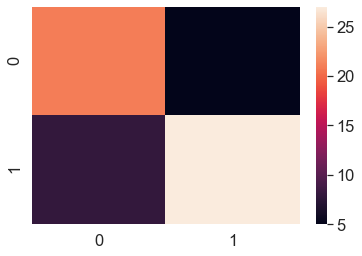

In [170]:
# Make our confusion matrix more visual with Seaborn Heatmap
import seaborn as sns

#Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

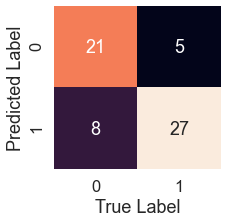

In [171]:
def plot_conf_mat(conf_mat):
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, # Annotate the boxers with conf_mat info
                    cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(conf_mat)

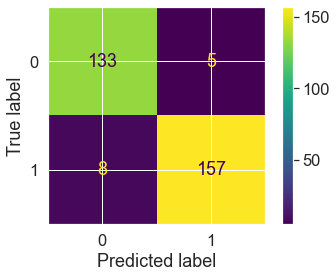

In [172]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y)

**Classification Report**



In [173]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



**Recall**: no false negatives = 1.0
**F1 Score**: Combination of precision and recall. Perfect model achieves 1.0

**Support**: The numbers of samples

**Macro Average**: If you have class imbalances, pay attention to this. ( Se tem mais 1 do que 0, por exemplo)

**Weighted avg**: Cada métrica é calculada de acordo com a quant de samples de 1 e 0

**F1-score**: combination of precision and recall.


### PS: isso é útil quando a quantidade de 1 e 0 são bem diferentes

In [174]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\erica\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Evaluating a Regression Model

Model evaluation metrics https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounce r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your model's predictions to the mean of the targets. Values can range from negativity ( a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [175]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train);

In [176]:
model.score(x_test,y_test)

0.8654448653350507

In [177]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [178]:
y_test.mean()

21.488235294117644

In [179]:
r2_score(y_test, y_test_mean)

0.0

In [180]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are

In [181]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [182]:
df = pd.DataFrame(data = {'actual values': y_test,
                         'predicted values': y_preds})

df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error (MSE)**

In [183]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

* Pay more attention to MAE: when being 10,000 off is **twice** as bad as being 5,000 off.
* Pay more attention to MSE: when being 10,000 off is more than **twice** as bad as being 5,000 off.

### 4.2.3 Finally using the `scoring` parameters

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)


In [185]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv = 5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [186]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [187]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv = 5, scoring='accuracy')
cv_acc
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [188]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring='precision')
np.mean(cv_precision)

0.8329547346025924

In [189]:
# Recall
cv_recall = cross_val_score(clf, x, y, scoring= 'recall')
np.mean(cv_recall)

0.8424242424242424

In [190]:
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = 'f1')
np.mean(cv_f1)

0.8298583662714097

In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df.target

model = RandomForestRegressor(n_estimators=100)

In [196]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x,y,cv = 5, scoring = None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [197]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x,y,cv = 5, scoring = 'r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [198]:
# Mean Absolute Error
np.random.seed(42)
cv_mae = cross_val_score(model, x, y , cv = 5, scoring = 'neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [199]:
# Mean Squared Error 
cv_mse = cross_val_score(model, x, y, scoring = 'neg_mean_squared_error')
np.mean(cv_mse)

-21.535985132246157

### 4.3 Using different evaluation metrics as Scikit-Learn Functions

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# Make some predictions
y_preds = clf.predict(x_test)

# Evaluate the classifier
print('Classifier metrics on the test set \n')
print(f'Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision:{precision_score(y_test, y_preds)}')
print(f'Recall:{recall_score(y_test, y_preds)}')
print(f'F1:{f1_score(y_test, y_preds)}')

Classifier metrics on the test set 

Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


**Regression Evaluation Functions**

In [201]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop('target',axis = 1)
y = boston_df.target

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

print('Classifier metrics on this test set\n')
print(f'R^2:{r2_score(y_test, y_preds)}')
print(f'MAE:{mean_absolute_error(y_test, y_preds)}')
print(f'MSE:{mean_squared_error(y_test, y_preds)}')

Classifier metrics on this test set

R^2:0.8654448653350507
MAE:2.136382352941176
MSE:9.867437068627442


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data the better)
* Could we improve our data? More features, more info about each sample

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

**Parameters vs Hyperparameters**

Parameters = model find these patterns in data
Hyperparameters = settings on a model you can adjust to (potentially) imporve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GrideSearchCV

In [202]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [203]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust:

* `max_step`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [207]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true labels vs. y_preds labels.
    on a classification model.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                   'precison': round(precision,2),
                   'recall': round(recall,2),
                   'f1': round(f1,2)}
    print(f'Acc:{accuracy *100:.2f}%')
    print(f'Precision:{precision :.2f}')
    print(f'Recall:{recall:.2f}')
    print(f'F1:{f1:.2f}')
          
    return metric_dict

In [208]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

#Split into x and y
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled.target

#Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc:82.22%
Precision:0.81
Recall:0.88
F1:0.85


{'accuracy': 0.82, 'precison': 0.81, 'recall': 0.88, 'f1': 0.85}

In [209]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [210]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf':[1,2,4]}

np.random.seed(42)

#Split into x and y

x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled.target

# Split into train and test
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions= grid,
                           n_iter=10, # number of models to try
                           cv = 5,
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [213]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [214]:
# agr vai usar o melhor para o predict

# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1:0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [215]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [216]:
grid_2 = {'n_estimators':[100,200,500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf':[1,2]}

In [217]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#Split into x and y

x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled.target

# Split into train and test
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.7s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   54.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [218]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [219]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


Let's compare the models metrics

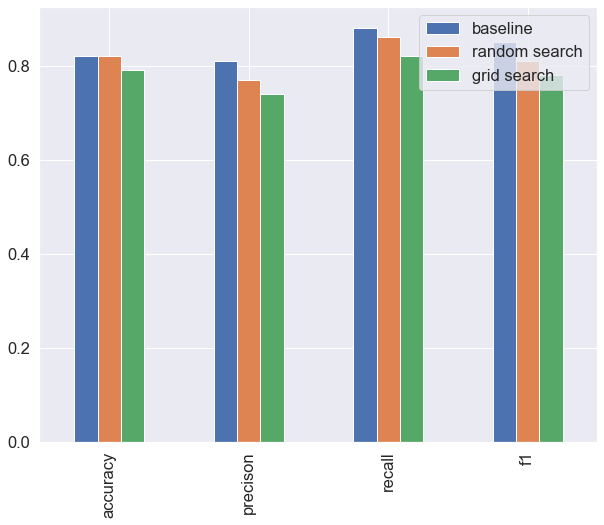

In [220]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})

compare_metrics.plot.bar(figsize = (10,8));

## 6. Saving and Loading Trained Machine Learning Models

Two ways to save and load machine learning models:
    
  1. With Python's `pickle` module
  2. With the `joblib` module

In [221]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [223]:
# Load a saved model

loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl','rb'))

In [224]:
# Make some predictions

pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precison': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [225]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename = 'gs_random_forest1.joblib')

['gs_random_forest1.joblib']

In [226]:
# Import a saved joblib model
loaded_job_model = load(filename = 'gs_random_forest1.joblib')

In [227]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precison': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together!

In [228]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [229]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [230]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [242]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCv` or `RandomizedSearchCV` with our `Pipeline`

In [243]:
# Use GridSearchCV with our Regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators':[100,1000],
    'model__max_depth': [None, 5],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__min_samples_split=2, model__n_estimat

[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   4.3s
[CV] model__max_depth=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   4.5s
[CV] model__max_depth=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   4.6s
[CV] model__max_depth=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   4.3s
[CV] model__max_depth=None, model__min_samples_split=4, model

[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, pre

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [245]:
gs_model.score(x_test, y_test)

0.3339554263158365